In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import urllib.request as url
import json

In [3]:
path = "https://data.covid19india.org/states_daily.json"
response = url.urlopen(path)
data = json.load(response)

In [6]:
states = data['states_daily']

In [8]:
states = pd.DataFrame(states)

In [9]:
states.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [13]:
states['tt'] = states['tt'].astype('int')
states['dl'] = states['dl'].astype('int')
states['up'] = states['up'].astype('int')
states['rj'] = states['rj'].astype('int')

In [17]:
states['dateymd'][0]

'2020-03-14'

In [18]:
states['dateymd'] = pd.to_datetime(states['dateymd'])

In [19]:
states['dateymd'][0]

Timestamp('2020-03-14 00:00:00')

In [20]:
confirmed_df = states[states['status'] == 'Confirmed']
recovered_df = states[states['status'] == 'Recovered']
deceased_df = states[states['status'] == 'Deceased']

In [21]:
confirmed_df['tt'].sum()

32249044

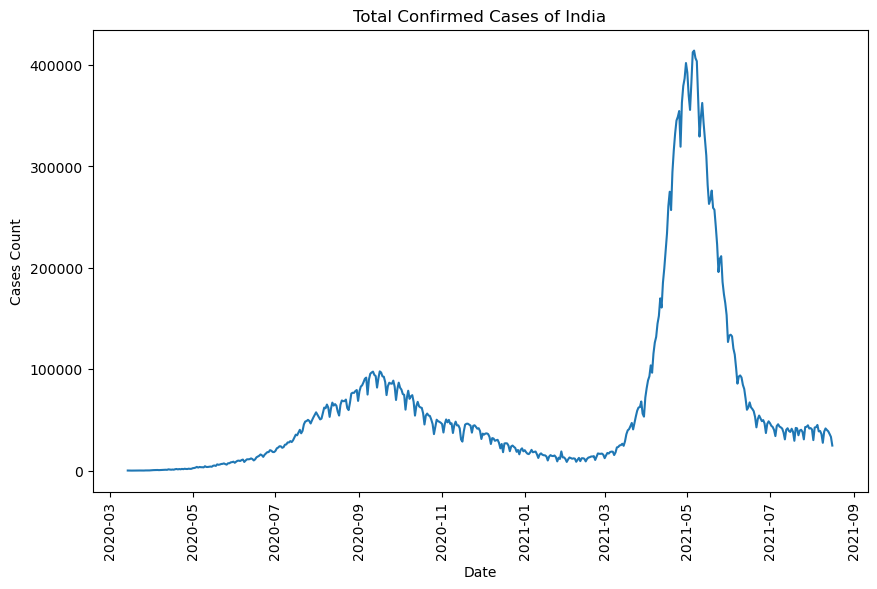

In [25]:
plt.figure(figsize=(10,6))
plt.title("Total Confirmed Cases of India")
plt.plot(confirmed_df['dateymd'], confirmed_df['tt'])
plt.xlabel("Date")
plt.ylabel("Cases Count")
plt.xticks(rotation='vertical')
plt.show()

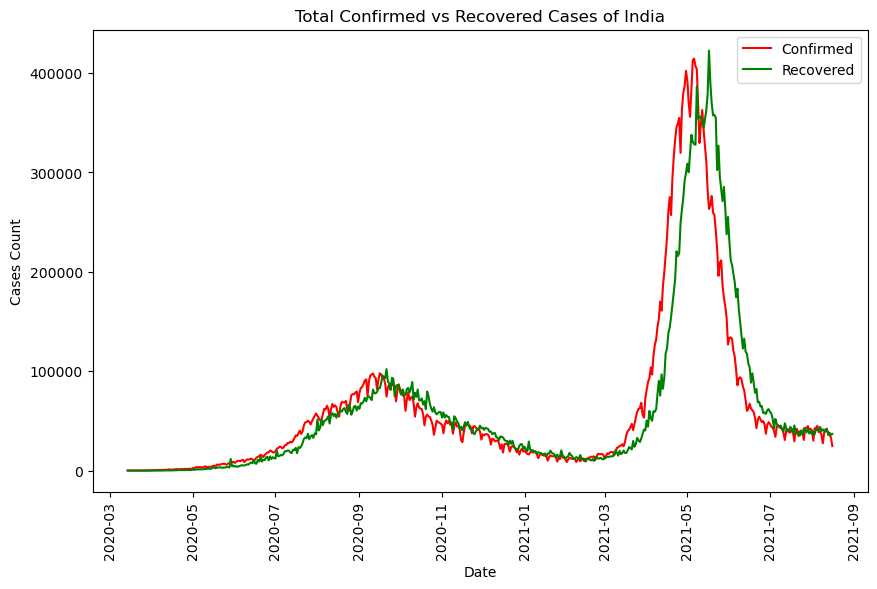

In [28]:
plt.figure(figsize=(10,6))
plt.title("Total Confirmed vs Recovered Cases of India")
plt.plot(confirmed_df['dateymd'], confirmed_df['tt'], label='Confirmed', color='red')
plt.plot(recovered_df['dateymd'], recovered_df['tt'], label='Recovered', color='green')
plt.xlabel("Date")
plt.legend()
plt.ylabel("Cases Count")
plt.xticks(rotation='vertical')
plt.show()

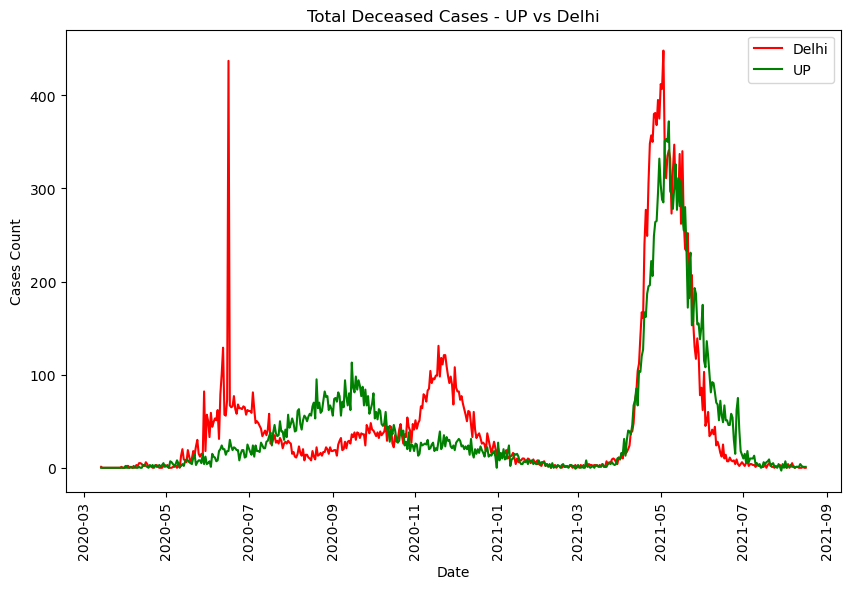

In [29]:
plt.figure(figsize=(10,6))
plt.title("Total Deceased Cases - UP vs Delhi")
plt.plot(deceased_df['dateymd'], deceased_df['dl'], label='Delhi', color='red')
plt.plot(deceased_df['dateymd'], deceased_df['up'], label='UP', color='green')
plt.xlabel("Date")
plt.legend()
plt.ylabel("Cases Count")
plt.xticks(rotation='vertical')
plt.show()